# EDA for the imported data

### Generic imports lines and util functions that do not directly correlate to the actual analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os, math

from src.utils.config import load_config, ensure_dirs

def get_path(p: str) -> str:
    """
    Return the absolute path of a file in the project
    :param p: file's path to get the path for
    :return: the absolute path of the file
    """
    current_dir = os.path.sep.join(os.getcwd().split(os.path.sep)[:-2])
    return os.path.join(current_dir, p)

cfg = load_config(get_path("config.yaml"))


### Merging the imported files

Merges the imported files in the interim directory and concat them into a single df for analysis.

In [2]:
interim_data_path = get_path(cfg["paths"]["interim_dir"])

dfs = []
recorded_labels = set()
for d in os.listdir(interim_data_path):
    temp_df = pd.read_csv(os.path.join(interim_data_path, str(d)))
    df_label = str(temp_df["label"].iloc[0])
    recorded_labels.add(df_label)
    dfs += [temp_df]

df = pd.concat(dfs, axis=0, ignore_index=True)

In [3]:
print(f"Number of records: {len(df)} with {len(recorded_labels)} unique labels")

Number of records: 501 with 3 unique labels


In [4]:
# Remove bootstrap entries
df = df[df["context"] != "bootstrap"]

In [5]:
df.shape

(498, 14)

In [6]:
df.head()

,session_id,avg_scroll_distance,avg_click_interval,avg_dx,duration,keystroke_count,context,clicks_per_minute,median_cpm,avg_dy,avg_hold_time,avg_cpm,shortcut_count,label
0,73e071b0-eb0a-4032-9d9e-71d0b3e5b18a,0.0,0.00,5.54,5.01,1.0,capture,0.00,0.0,9.21,0.08,0.0,0.0,user1
1,fa6fab72-5349-454f-a3ac-45ab04b5904e,0.0,0.00,5.30,0.78,1.0,capture,0.00,0.0,8.27,0.11,0.0,1.0,user1
2,d7fce1d8-8237-4086-bf59-525f0280c34c,0.0,2.22,5.72,2.49,2.0,capture,40.46,0.0,7.20,0.12,0.0,1.0,user1
3,1d71bc28-2635-4e09-bd48-66c8dbb1e776,0.0,1.84,5.67,0.28,2.0,capture,43.51,0.0,7.04,0.12,0.0,1.0,user1
4,a608306d-e630-4244-958f-1263cb1f9b48,0.0,1.84,5.67,0.66,2.0,capture,43.51,0.0,7.04,0.15,0.0,2.0,user1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 498 entries, 0 to 500
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   session_id           498 non-null    object 
 1   avg_scroll_distance  498 non-null    float64
 2   avg_click_interval   498 non-null    float64
 3   avg_dx               496 non-null    float64
 4   duration             498 non-null    float64
 5   keystroke_count      498 non-null    float64
 6   context              498 non-null    object 
 7   clicks_per_minute    498 non-null    float64
 8   median_cpm           498 non-null    float64
 9   avg_dy               496 non-null    float64
 10  avg_hold_time        498 non-null    float64
 11  avg_cpm              498 non-null    float64
 12  shortcut_count       498 non-null    float64
 13  label                498 non-null    object 
dtypes: float64(11), object(3)
memory usage: 58.4+ KB


### Handling null values

In [8]:
df.isnull().sum()

session_id             0
avg_scroll_distance    0
avg_click_interval     0
avg_dx                 2
duration               0
keystroke_count        0
context                0
clicks_per_minute      0
median_cpm             0
avg_dy                 2
avg_hold_time          0
avg_cpm                0
shortcut_count         0
label                  0
dtype: int64

In [9]:
df.fillna(0, inplace=True)

In [10]:
df.isnull().sum()

session_id             0
avg_scroll_distance    0
avg_click_interval     0
avg_dx                 0
duration               0
keystroke_count        0
context                0
clicks_per_minute      0
median_cpm             0
avg_dy                 0
avg_hold_time          0
avg_cpm                0
shortcut_count         0
label                  0
dtype: int64

### Feature distribution

In [11]:
df_label = []
for label in recorded_labels:
    subset = df[df["label"] == label]
    df_label.append(subset)

numeric_cols = df.select_dtypes('number').columns

In [12]:
n_cols = 2
n_rows = math.ceil(len(numeric_cols) / n_cols)

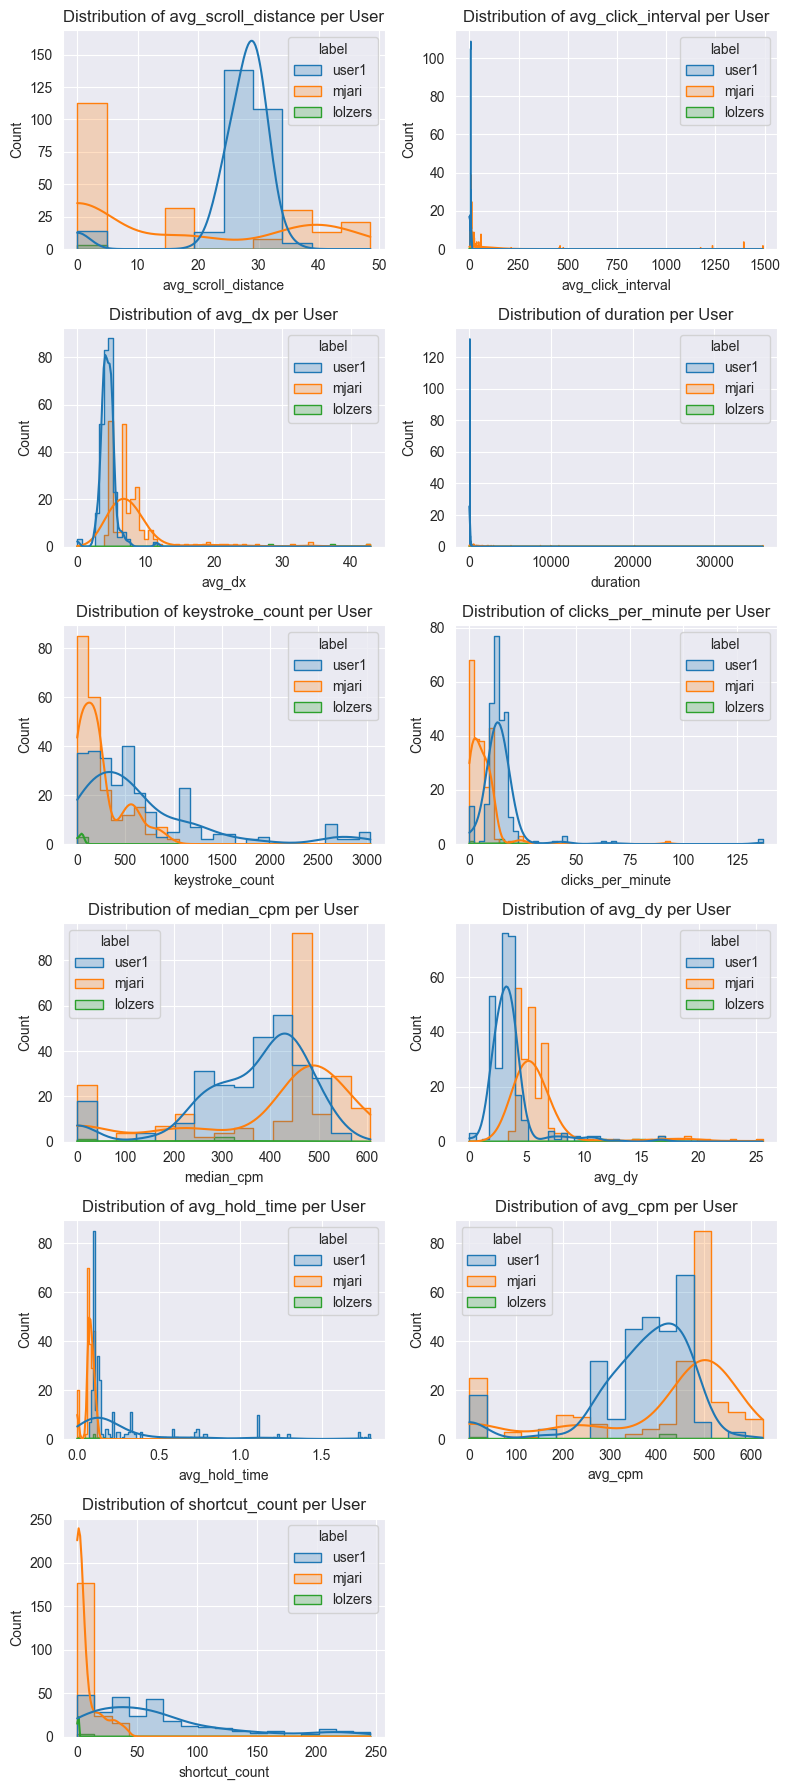

In [13]:
plt.figure(figsize=(n_cols * 4, n_rows * 3))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.histplot(data=df, x=col, hue='label', kde=True, element='step')
    plt.title(f"Distribution of {col} per User")
    plt.tight_layout()

plt.show()

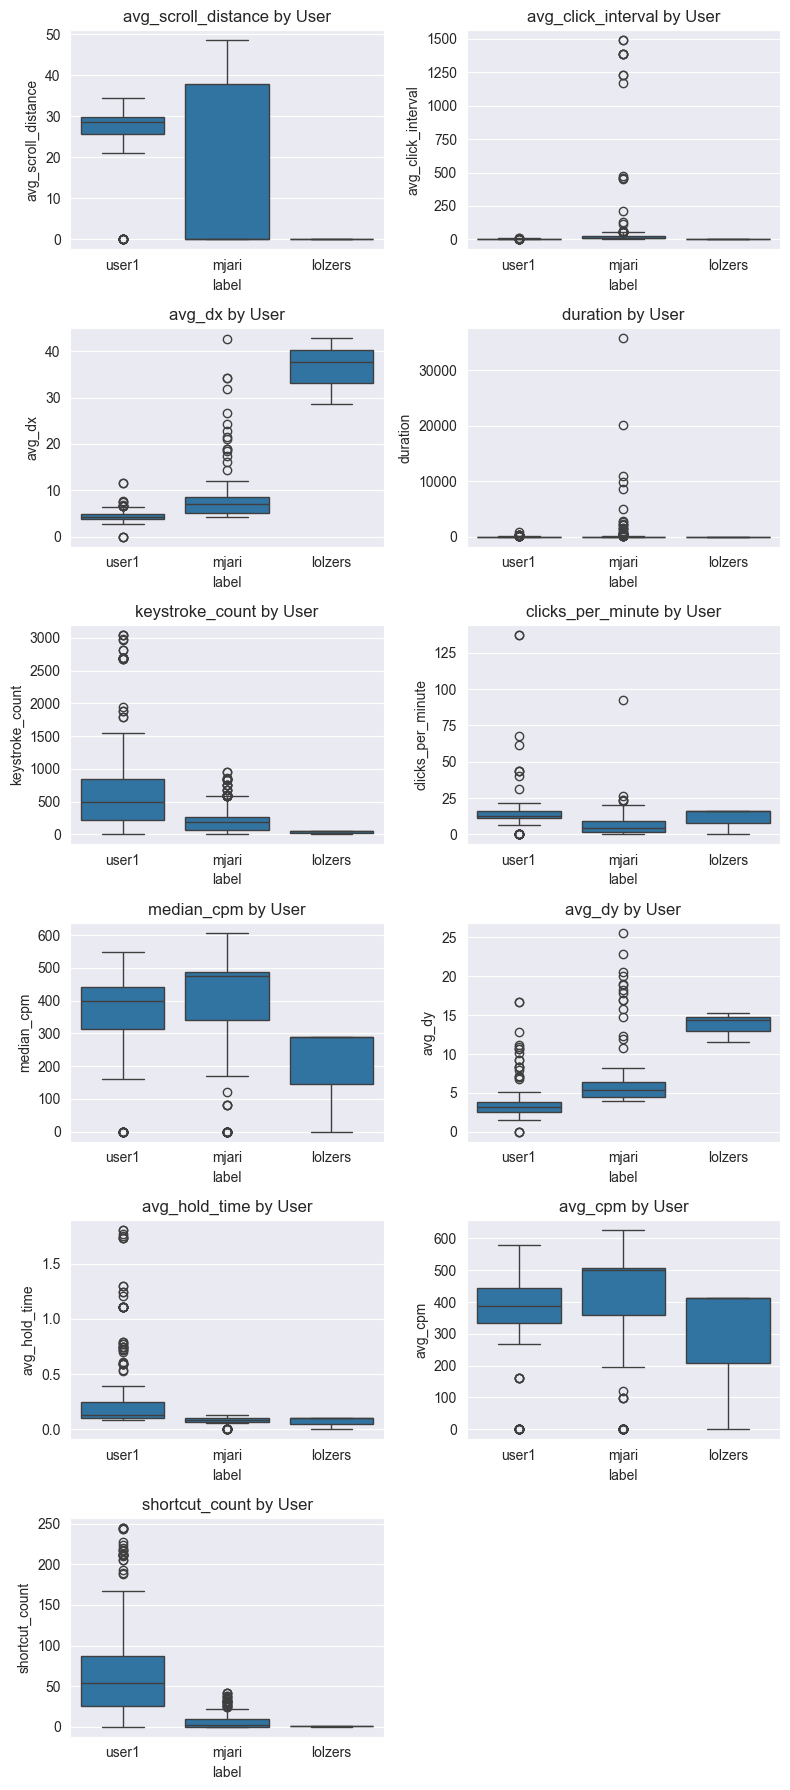

In [14]:
plt.figure(figsize=(n_cols * 4, n_rows * 3))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.boxplot(x='label', y=col, data=df)
    plt.title(f"{col} by User")
    plt.tight_layout()

plt.show()